In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Lecture 12 Answers #

In [2]:
nba = Table.read_table('nba_salaries.csv')
sky = Table.read_table('skyscrapers_v2.csv')
billion = Table.read_table('billionaires.csv')

### Question 1

Construct a table of billionaires with United States citizenship, listed from highest net worth to lowest. The table should only include the name and net worth of the billionaires.

How many billionaires have United States citizenship?

In [3]:
US_billion = billion.where('citizenship', 'United States'
                          ).sort('net worth', descending=True
                                ).select('name', 'net worth')
US_billion

name,net worth
Jeff Bezos,115739645754
Bill Gates,115488591742
Warren Buffett,89408278188
Mark Zuckerberg,83053011017
Larry Page,69933009751
Sergey Brin,67825250468
Charles Koch,61046822719
Julia Flesher Koch,61038443719
Steve Ballmer,60550361299
Larry Ellison,60426508503


In [4]:
US_billion.num_rows

172

### Question 2

Add a column to the table from question 1 that lists the net worth in billions of dollars rather than dollars. Use this new column to construct a histogram for the net worth of billionaires with bins equal to 10 billion dollars. 

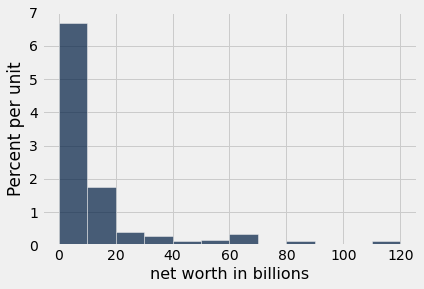

In [5]:
US_billion = US_billion.with_column(
    'net worth in billions', US_billion.column('net worth') / 1e9
)

US_billion.hist('net worth in billions', bins = np.arange(0, 130, 10))

### Question 3

Using the histogram from question 2, approximately what percentage of US billionaires have net worths of less than 10 billion dollars?

In [6]:
width = 10
approx_height = 6.75

Area = width * approx_height
Area

67.5

### Question 4

What is the average net worth of billionaires with a net worth below 10 billion dollars, in billions of dollars?

In [7]:
np.mean(billion.where('net worth', are.below(10000000000)).column('net worth'))/1000000000

6.371582804940829

### Question 5

Construct a bar plot for the counts of billions for each citizenship, from highest count to lowest, showing only the top 10 citizenships.

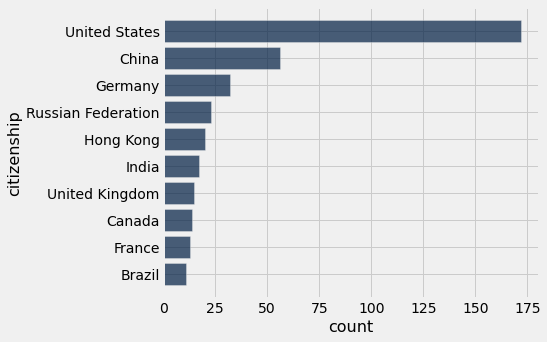

In [8]:
billion.group('citizenship'
             ).sort('count', descending=True
                   ).take(np.arange(0,10,1)
                         ).barh('citizenship'
                               )

### Question 6

Which NBA teams spent the most on their “starters” in 2015-2016?

Assume the “starter” for a team & position is the player with the highest salary on that team in that position.

In [16]:
nba2 = nba.drop('PLAYER').group(['TEAM', 'POSITION'], np.max)
nba3 = nba2.group('TEAM', np.sum).drop('POSITION sum')
nba4 = nba3.relabeled("'15-'16 SALARY amax sum", "'15-'16 SALARY").sort("'15-'16 SALARY", descending=True)
nba4.show(5)

TEAM,'15-'16 SALARY
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431


### Question 7

Construct a scatter plot with the heights and years completed for the skyscrapers. Describe any trends in the data that you can see in the plot.

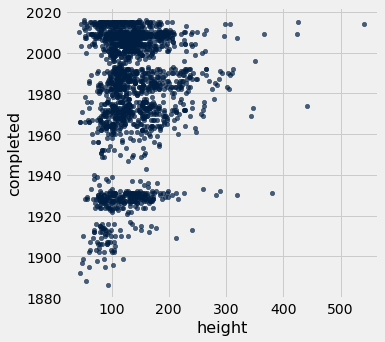

In [10]:
sky.scatter('height', 'completed')

More taller skyscrapers seem to be build as the data completed increases.

Very few skyscapers were built during the time periods of World War I and World War II.

Most skyscrapers appear to be below 100 meters in height.

### Question 8

Define a function that converts a length in meters to feet. Convert the heights of the skyscrapers in the table (initially in meters) to feet in the table and relabel the column height in feet.

In [11]:
def convert_m_ft(meters):
    return 3.28084 * meters

sky.apply(convert_m_ft, 'height')
sky = sky.with_column(
    'height in feet', 
    sky.apply(convert_m_ft, 'height')
).drop('height')

sky    

name,material,city,completed,height in feet
One World Trade Center,mixed/composite,New York City,2014,1775.92
Willis Tower,steel,Chicago,1974,1450.59
432 Park Avenue,concrete,New York City,2015,1396
Trump International Hotel & Tower,concrete,Chicago,2009,1388.52
Empire State Building,steel,New York City,1931,1250
Bank of America Tower,mixed/composite,New York City,2009,1200.13
Stratosphere Tower,concrete,Las Vegas,1996,1149.02
Aon Center,steel,Chicago,1973,1136.02
John Hancock Center,steel,Chicago,1969,1127.59
Chrysler Building,steel,New York City,1930,1046.26


### Question 9
For each city, what’s the tallest building for each material?

In [12]:
sky.select('material', 'city', 'height in feet'
          ).group(['city', 'material'], max).show(5)

city,material,height in feet max
Atlanta,concrete,866.962
Atlanta,mixed/composite,1022.97
Atlanta,steel,556.004
Austin,concrete,682.907
Austin,steel,307.087


### Question 10
For each city, what’s the height difference (in feet) between the tallest steel building and the tallest concrete building?

In [13]:
sky_p = sky.pivot('material', 'city', 'height in feet', max)
sky_p.show()

city,concrete,mixed/composite,steel
Atlanta,866.962,1022.97,556.004
Austin,682.907,0,307.087
Baltimore,529.003,0,509.022
Boston,400,456.037,789.993
Charlotte,870.997,786.417,588.025
Chicago,1388.52,1007.02,1450.59
Cincinnati,410.105,664.993,574.147
Cleveland,410.105,947.014,708.005
Columbus,260.007,0,555.446
Dallas,579.003,920.997,886.024


In [14]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p.show(5)

city,concrete,mixed/composite,steel,difference
Atlanta,866.962,1022.97,556.004,310.958
Austin,682.907,0,307.087,375.82
Baltimore,529.003,0,509.022,19.9804
Boston,400,456.037,789.993,389.993
Charlotte,870.997,786.417,588.025,282.973


In [15]:
sky_p.sort('difference', True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,643.045,0,0,643.045
Las Vegas,1149.02,641.995,540.026,608.99
Miami Beach,559.022,0,0,559.022
Pittsburgh,292.979,564.304,841.011,548.031
Los Angeles,478.018,387.992,1018.01,539.993
Philadelphia,518.012,973.524,945.013,427.001
Boston,400,456.037,789.993,389.993
Austin,682.907,0,307.087,375.82
Seattle,455.02,933.005,772.014,316.995
Atlanta,866.962,1022.97,556.004,310.958
